In [1]:
from utils import *

In [2]:
house = load('data/uk_house_prices.csv')
house.head()

,region,avg_price
date,,
1968-04-01,England,3408.108064
1968-04-01,Scotland,2844.980688
1968-04-01,Northern Ireland,3661.485500
1968-04-01,Wales,2885.414162
1968-04-01,West Midlands Region,3328.858802


In [3]:
oxford = house[house['region']=='Oxford'].drop('region', axis=1).pct_change()
oxford.head()

,avg_price
date,
1995-01-01,NaN
1995-02-01,-0.003265
1995-03-01,-0.022583
1995-04-01,-0.014538
1995-05-01,-0.013151


In [4]:
coventry = house[house['region']=='Coventry'].drop('region',axis=1).pct_change()
coventry.head()

,avg_price
date,
1995-01-01,NaN
1995-02-01,0.018455
1995-03-01,0.002532
1995-04-01,0.011080
1995-05-01,0.002433


In [5]:
rate = load('data/GBPUSD.csv')
msci_world = load('data/MSCI_World.csv')
msci_world.nominal = (msci_world.nominal / rate.adj_close).pct_change()
msci_world = msci_world.dropna()
msci_world.head()

,real,CPI,nominal
date,,,
2004-01-01,1559.383129,78.137855,0.041022
2004-02-01,1574.909855,78.559766,-0.011675
2004-03-01,1589.153459,79.066059,0.032680
2004-04-01,1570.014472,79.319205,0.027221
2004-05-01,1526.249758,79.783307,-0.051005


Correlation: 0.13919113721571313


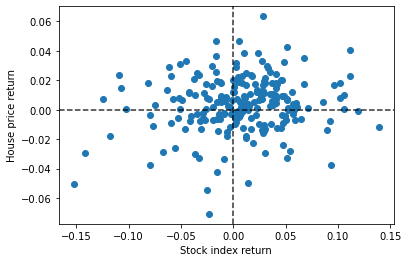

In [6]:
df_ox = oxford.join(msci_world).dropna()
plt.scatter(df_ox.nominal, df_ox.avg_price)
plt.xlabel('Stock index return')
plt.ylabel('House price return')
plt.axhline(color='black', linestyle='--', alpha=0.8)
plt.axvline(color='black', linestyle='--', alpha=0.8)
print(f'Correlation: {np.corrcoef(df_ox.nominal, df_ox.avg_price)[0, 1]}')

Correlation: 0.08526828810858379


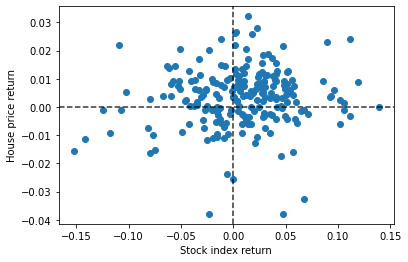

In [7]:
df_cov = coventry.join(msci_world).dropna()
plt.scatter(df_cov.nominal, df_cov.avg_price)
plt.xlabel('Stock index return')
plt.ylabel('House price return')
plt.axhline(color='black', linestyle='--', alpha=0.8)
plt.axvline(color='black', linestyle='--', alpha=0.8)
print(f'Correlation: {np.corrcoef(df_cov.nominal, df_cov.avg_price)[0, 1]}')

In [8]:
oxford_beta = sm.OLS(df_ox.avg_price, df_ox.nominal).fit()
oxford_beta.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              avg_price   R-squared (uncentered):                   0.028
Model:                            OLS   Adj. R-squared (uncentered):              0.023
Method:                 Least Squares   F-statistic:                              5.459
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                      0.0204
Time:                        19:14:39   Log-Likelihood:                          549.67
No. Observations:                 216   AIC:                                     -1097.
Df Residuals:                     215   BIC:                                     -1094.
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nominal        0.0672      0.029      2.336      0.020       0.011       0.124
==============================================================================
Omnibus:                       13.336   Durbin-Watson:                   1.359
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               19.370
Skew:                          -0.398   Prob(JB):                     6.22e-05
Kurtosis:                       4.233   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC1)
"""

In [9]:
coventry_beta = sm.OLS(df_cov.avg_price, df_cov.nominal).fit()
coventry_beta.get_robustcov_results().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:              avg_price   R-squared (uncentered):                   0.017
Model:                            OLS   Adj. R-squared (uncentered):              0.012
Method:                 Least Squares   F-statistic:                              4.046
Date:                Wed, 23 Feb 2022   Prob (F-statistic):                      0.0455
Time:                        19:14:39   Log-Likelihood:                          667.96
No. Observations:                 216   AIC:                                     -1334.
Df Residuals:                     215   BIC:                                     -1331.
Df Model:                           1                                                  
Covariance Type:                  HC1                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
nominal        0.0302      0.015      2.011      0.046       0.001       0.060
==============================================================================
Omnibus:                       26.126   Durbin-Watson:                   1.094
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.790
Skew:                          -0.576   Prob(JB):                     7.68e-13
Kurtosis:                       5.208   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors are heteroscedasticity robust (HC1)
"""